In [ ]:
!pip install gymnasium

import time
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# function to plot reward
def plot_reward(reward_list, reward_avg_list):
  plt.plot(reward_list, 'g', label='Reward')
  plt.plot(reward_avg_list, 'r', label='Average Reward')
  plt.xlabel('Episode')
  plt.ylabel('Reward Value')
  plt.title('Rewards Per Episode')
  plt.grid()
  plt.legend()
  plt.show()

# function to plot epsilon
def plot_epsilon(epsilon_list):
  plt.plot(epsilon_list)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon Values')
  plt.title('Epsilon Decay')
  plt.grid()
  plt.show()

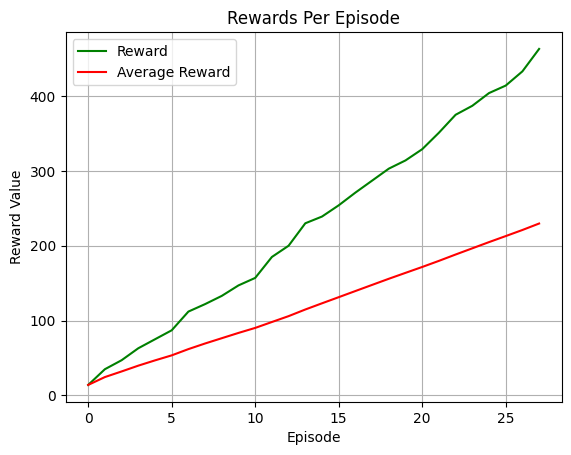

In [ ]:
# Vanilla CartPole-v1 Environment

environment = gym.make('CartPole-v1')
observation, info = environment.reset()

score = 0
reward_list, reward_avg_list = [], []

for itr in range(500):
  action = environment.action_space.sample()
  observation, reward, terminated, truncated, info = environment.step(action)

  score += reward

  if terminated or truncated:
    reward_list.append(score)
    reward_avg_list.append(sum(reward_list)/len(reward_list))    
    observation, info = environment.reset()
        
environment.close()

plot_reward(reward_list, reward_avg_list)

action = environment.action_space.sample()

In [ ]:
# Wind noise function
def wind_noise(action):
  wind_direction = np.random.randint(0, 3)
  double_action = False
  
  if wind_direction == 0:  # no wind
    wind_action = action
  
  # Wind blows in the left direction and left action is taken
  elif wind_direction == 1 and action == 0:
    wind_action = 0  # left action
    double_action = True

  # Wind blows in the right direction and right action is taken
  elif wind_direction == 2 and action == 1:
    wind_action = 1  # Right action
    double_action = True
    
  else:
    wind_action = action # no wind_action

  return double_action, wind_action

# Modified environment step function 
def modified_env_step(environment, action):
  # Check action caused by wind
  double_action, wind_action = wind_noise(action)

  # Take steps
  if not double_action:
    observation, reward, terminated, truncated, info = environment.step(wind_action)
  else:
    observation, reward1, terminated, truncated, info = environment.step(action)
    if (terminated or truncated):
      reward = reward1
    else:
      observation, reward2, terminated, truncated, info = environment.step(wind_action)
      reward = reward1 + reward2

  return observation, reward, terminated, truncated, info

# Modified Environment Step Function Usage
environment = gym.make('CartPole-v1')
observation, info = environment.reset()

action = environment.action_space.sample()

observation, reward, terminated, truncated, info = modified_env_step(environment, action)

print(observation, reward, terminated, info)

[-0.04033214  0.2013736   0.03722126 -0.23999591] 1.0 False {}


In [ ]:
# Modified environment step function with print statements
def modified_env_step_print(environment, action):
  # Check action caused by wind
  double_action, wind_action = wind_noise(action)

  # Take steps
  if not double_action:
    observation, reward, terminated, truncated, info = environment.step(wind_action)
    print('Step:', observation, reward, terminated, truncated, info)
    print('Noise: No Wind Action')
  else:
    observation, reward1, terminated, truncated, info = environment.step(action)
    print('Step:', observation, reward1, terminated, truncated, info)
    if (terminated or truncated):
      reward = reward1
    else:
      observation, reward2, terminated, truncated, info = environment.step(wind_action)
      print('Step:', observation, reward2, terminated, truncated, info)
      reward = reward1 + reward2
        
    if wind_action == 0:
      wind_action_desc = 'Left Direction'
    elif wind_action == 1:
      wind_action_desc = 'Right Direction'
    print('Noise: Wind Action', wind_action_desc)

  return observation, reward, terminated, truncated, info

# Modified environment step function usage
environment = gym.make('CartPole-v1')
observation, info = environment.reset()

action = environment.action_space.sample()

observation, reward, terminated, truncated, info = modified_env_step_print(environment, action)

print(observation, reward, terminated, info)

environment.close()

Step: [ 0.01037789 -0.20773697 -0.0186826   0.27801627] 1.0 False False {}
Step: [ 0.00622315 -0.40258747 -0.01312228  0.56474864] 1.0 False False {}
Noise: Wind Action Left Direction
[ 0.00622315 -0.40258747 -0.01312228  0.56474864] 2.0 False {}


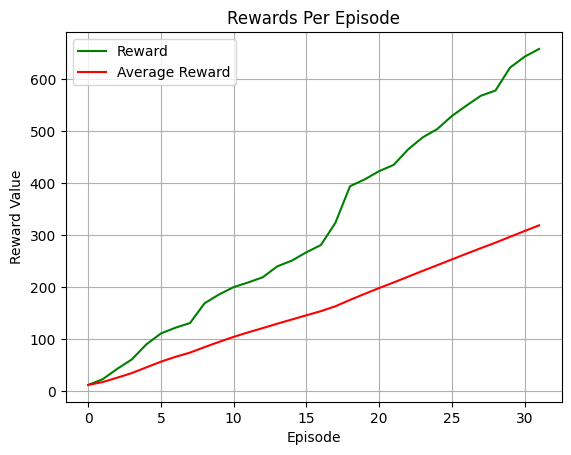

In [ ]:
# Modified CartPole-v1 Environment

environment = gym.make('CartPole-v1')
observation, info = environment.reset()

score = 0
reward_list, reward_avg_list = [], []

for itr in range(500):
  action = environment.action_space.sample()
  observation, reward, terminated, truncated, info = modified_env_step(environment, action)

  score += reward

  if terminated or truncated:
    reward_list.append(score)
    reward_avg_list.append(sum(reward_list)/len(reward_list))    
    observation, info = environment.reset()
        
environment.close()

plot_reward(reward_list, reward_avg_list)

action = environment.action_space.sample()